In [4]:
import os
os.chdir('C:\\Users\\reoeu\\Desktop\\2020-2\\데이터사이언스\\project\\데이터')

In [225]:
import pandas as pd
from collections import Counter

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [179]:
T = pd.read_csv('Cine21(完).csv')

# 숫자로만

## 시간

In [180]:
def clean_time(x):
    if pd.notnull(x):
        a = float(x[:-1])
    else:
        a = 'NaN'
    return a

In [181]:
T['상영시간'] = T.상영시간.apply(clean_time)

## 관객수

In [182]:
def clean_people(x):
    if pd.notnull(x):
        a = int(x.replace(',', '')[:-1])
    else:
        a = 'NaN'
    return a

In [183]:
T['누적관객'] = T.누적관객.apply(clean_people)

In [185]:
T['연도'] = T.연도.apply(lambda x: int(x) if pd.notnull(x) else 'NaN')

# 장르정리

In [186]:
def genre_cut(x):
    if pd.notnull(x):
        a = x.split(',')
    else:
        a = []
    return a

In [192]:
T['장르리스트'] = [x for x in T.장르.apply(genre_cut)]
T['장르리스트'] = T['장르리스트'].apply(lambda x: [y.strip() for y in x])

In [200]:
len(set([y.strip() for x in T.장르.apply(genre_cut) for y in x ]))

66

In [193]:
# Create MultiLabelBinarizer object
one_hot = MultiLabelBinarizer()

# One-hot encode data
onehot_genre = one_hot.fit_transform(T['장르리스트'])
onehot_genre = pd.DataFrame(onehot_genre, columns='genre_'+one_hot.classes_)

In [196]:
T = pd.concat([T.drop('장르리스트', axis=1), onehot_genre], axis=1)

# 국가 정리

In [63]:
def country_cut(x):
    if pd.notnull(x):
        a = x.split(',')
    else:
        a = []
    return a

In [198]:
T['국가리스트'] = [x for x in T.국가.apply(country_cut)]
T['국가리스트'] = T['국가리스트'].apply(lambda x: [y.strip() for y in x])

In [201]:
len(set([y.strip() for x in T.국가.apply(genre_cut) for y in x ]))

102

In [204]:
# Create MultiLabelBinarizer object
one_hot2 = MultiLabelBinarizer()

# One-hot encode data
onehot_country = one_hot2.fit_transform(T['국가리스트'])
onehot_country = pd.DataFrame(onehot_country, columns='country_'+one_hot2.classes_)

In [205]:
T = pd.concat([T.drop('국가리스트', axis=1), onehot_country], axis=1)

# 감독 정리

In [67]:
def  director_cut(x):
    if pd.notnull(x):
        a = x.split(',')
    else:
        a = []
    return a

In [69]:
len(set([y.strip() for x in T.감독.apply(director_cut) for y in x ]))

20577

In [224]:
Counter([y.strip() for x in T.감독.apply(director_cut) for y in x ]).most_common()

[('김수용', 106),
 ('임권택', 102),
 ('김기덕', 86),
 ('존 포드', 76),
 ('신상옥', 72),
 ('찰리 채플린', 71),
 ('왕정', 70),
 ('남기남', 61),
 ('고영남', 60),
 ('장 뤽 고다르', 59),
 ('이두용', 58),
 ('앨프리드 히치콕', 55),
 ('미이케 다카시', 54),
 ('두기봉', 53),
 ('이만희', 51),
 ('우디 앨런', 48),
 ('잉마르 베리만', 46),
 ('윌리엄 와일러', 45),
 ('츠츠미 유키히코', 43),
 ('서극', 42),
 ('클로드 샤브롤', 42),
 ('스티븐 프리어스', 41),
 ('김기영', 40),
 ('존 프랑켄하이머', 40),
 ('유현목', 40),
 ('존 휴스턴', 40),
 ('클린트 이스트우드', 39),
 ('스티븐 스필버그', 39),
 ('켄 로치', 38),
 ('이형표', 38),
 ('구로사와 기요시', 36),
 ('유위강', 36),
 ('김응천', 36),
 ('로버트 알트먼', 34),
 ('마틴 스코시즈', 34),
 ('장철', 32),
 ('브라이언 드 팔마', 31),
 ('스티븐 소더버그', 31),
 ('프리츠 랑', 31),
 ('홍금보', 31),
 ('류신의', 31),
 ('스파이크 리', 30),
 ('오우삼', 30),
 ('마이클 앱티드', 30),
 ('구로자와 아키라', 30),
 ('더글러스 서크', 30),
 ('박호태', 30),
 ('김효천', 30),
 ('제임스 아이보리', 29),
 ('이성구', 29),
 ('유야마 쿠니히코', 29),
 ('오시이 마모루', 28),
 ('박철수', 28),
 ('라이너 베르너 파스빈더', 28),
 ('블레이크 에드워즈', 28),
 ('베르너 헤어조크', 28),
 ('변장호', 28),
 ('론 하워드', 27),
 ('라세 할스트롬', 27),
 ('조문진', 27),
 ('시드니 루멧', 27),
 (

# 출연자 정리

In [260]:
def  act_cut(x):
    if pd.notnull(x):
        a = x.replace('[', '')
        a = a.replace(']', '')
        a = a.split(',')
    else:
        a = 'NaN'
    return a

In [263]:
T['배우리스트'] = [x for x in T.출연자.apply(act_cut)]
T['배우리스트'] = T['배우리스트'].apply(lambda x: [y.strip() for y in x])

In [284]:
Counter([y.strip()[1:-1] for x in T.배우리스트 for y in x]).most_common()

[('', 13819),
 ('강신성일', 301),
 ('윤정희', 162),
 ('신영균', 135),
 ('김지미', 135),
 ('유덕화', 111),
 ('박노식', 111),
 ('김진규', 107),
 ('문희', 100),
 ('최무룡', 93),
 ('남궁원', 79),
 ('최은희', 76),
 ('안성기', 75),
 ('홍금보', 74),
 ('니콜라스 케이지', 73),
 ('제라르 드빠르디유', 73),
 ('로버트 드니로', 72),
 ('성룡', 72),
 ('남정임', 70),
 ('찰리 채플린', 68),
 ('브루스 윌리스', 63),
 ('마이클 케인', 63),
 ('주윤발', 62),
 ('허장강', 61),
 ('장동휘', 61),
 ('이대근', 58),
 ('사무엘 L. 잭슨', 54),
 ('임달화', 54),
 ('안소니 홉킨스', 52),
 ('톰 행크스', 52),
 ('니콜 키드먼', 52),
 ('까뜨린느 드뇌브', 52),
 ('안토니오 반데라스', 51),
 ('이자벨 위페르', 51),
 ('리암 니슨', 50),
 ('조니 뎁', 50),
 ('신동엽', 50),
 ('도널드 서덜런드', 49),
 ('이병헌', 49),
 ('데니스 퀘이드', 49),
 ('이영하', 49),
 ('전현무', 49),
 ('이완 맥그리거', 48),
 ('김승호', 48),
 ('스티븐 시걸', 48),
 ('양가휘', 48),
 ('문정숙', 48),
 ('엄앵란', 48),
 ('줄리엣 비노쉬', 47),
 ('주성치', 47),
 ('김희라', 47),
 ('고천락', 47),
 ('실베스터 스탤론', 46),
 ('황추생', 46),
 ('김병만', 46),
 ('알 파치노', 45),
 ('클린트 이스트우드', 45),
 ('존 쿠삭', 45),
 ('로빈 윌리엄스', 45),
 ('알렉 볼드윈', 45),
 ('아사노 타다노부', 45),
 ('김혜수', 44),
 ('덴젤 워싱턴', 44),
 ('메

# 각 카테고리 갯수

In [292]:
T.iloc[:, 15:81].sum().sort_values(ascending = False).head(20)

genre_드라마       23654
genre_코미디        7124
genre_액션         5445
genre_멜로·로맨스     4646
genre_범죄         4199
genre_다큐멘터리      3511
genre_스릴러        2609
genre_애니메이션      2482
genre_공포         2429
genre_연예/오락      2005
genre_단편 영화      2003
genre_SF         1507
genre_미스터리       1306
genre_판타지        1294
genre_전쟁          840
genre_휴먼드라마       775
genre_만화          740
genre_멜로          698
genre_교양/정보       653
genre_시사/다큐       628
dtype: int64

C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47708 missing from c

C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53300 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45436 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54589 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51200 missing from current fon

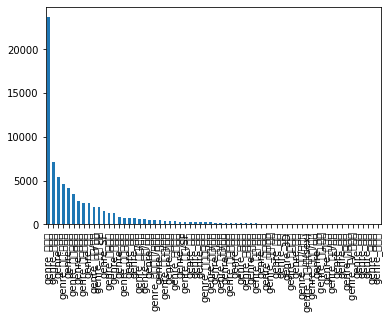

In [296]:
T.iloc[:, 15:81].sum().sort_values(ascending = False).plot.bar()

C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reoeu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46993 missing from c

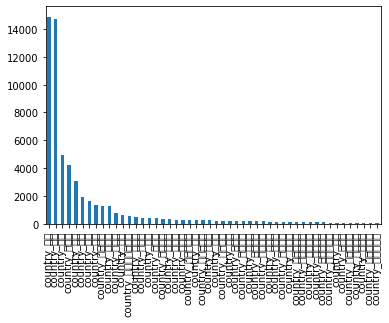

In [297]:
T.iloc[:, 82:183].sum().sort_values(ascending = False).head(50).plot.bar()